# 二叉树

## 二叉树的定义

In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

    def __str__(self) -> str:
        return self.printTree()

    @staticmethod
    def getHeight(node):
        if not node: return 0
        return 1 + max(TreeNode.getHeight(node.left), TreeNode.getHeight(node.right))

    def printTree(self) -> None:
        height = TreeNode.getHeight(self)
        width = 2 ** height - 1
        res = [["_" for _ in range(width)] for _ in range(height)]

        def fillTree(node, level, start, end, res):
            if not self:
                return
            mid = (start + end) // 2
            res[level][mid] = str(node.val)
            if node.left: fillTree(node.left, level + 1, start, mid - 1, res)
            if node.right: fillTree(node.right, level + 1, mid + 1, end, res)
            
        fillTree(self, 0, 0, width - 1, res)
        result = ""
        for row in res:
            result += " ".join(row) + "\n"
        return result

## 二叉树的构建
### 根据前/后序+中序遍历结果构建

In [2]:
def buildTree(preorder, inorder):
    if not inorder:
        return None
    root_val = preorder.pop(0)
    root_index = inorder.index(root_val)
    root = TreeNode(root_val)
    root.left = buildTree(preorder, inorder[:root_index])
    root.right = buildTree(preorder, inorder[root_index+1:])
    return root

def buildTree_in_post(inorder, postorder):
    if not postorder: return 
    root_val = postorder.pop()
    root = TreeNode(root_val)
    index_root = inorder.index(root_val)
    root.left = buildTree_in_post(inorder[:index_root], postorder[:index_root])
    root.right = buildTree_in_post(inorder[index_root+1:], postorder[index_root:])
    return root

testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
print(testTree)
testTree = buildTree_in_post([9,3,15,20,7], [9,15,7,20,3])
print(testTree)


_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _

_ _ _ 3 _ _ _
_ 9 _ _ _ 20 _
_ _ _ _ 15 _ 7



### 根据层序遍历结果构建

In [3]:
def buildTree_level(levelorder):
    length = len(levelorder)
    if length == 0:
        return None
    root_val = levelorder[0]
    root = TreeNode(root_val)
    Queue = [root]
    index = 1
    while Queue and index < length:
        for _ in range(len(Queue)):
            node = Queue.pop(0)
            left_val = levelorder[index] if index < length else None
            right_val = levelorder[index+1] if index + 1 < length else None
            if left_val != None:
                node.left = TreeNode(left_val)
                Queue.append(node.left)
            else:
                node.left = None
            if right_val != None:
                node.right = TreeNode(right_val)
                Queue.append(node.right)
            else:
                node.right = None
            index += 2
    return root

testTree = buildTree_level([1,2,3,4,None,None,5])
print(testTree)
testTree = buildTree_level([1,2])
print(testTree)
#         1
#     2       3
# 4               5

_ _ _ 1 _ _ _
_ 2 _ _ _ 3 _
4 _ _ _ _ _ 5

_ 1 _
2 _ _



## 二叉树遍历（非递归）

### 前序遍历

In [4]:
def preorderTraversal(root):
    if not root:
        return []
    stack = [root]
    visited = []
    lastpop = False
    while stack != []:
        node = stack[-1]
        print([i.val if i else i for i in stack], "==>\t", visited)
        if node is None:
            stack.pop()
            lastpop = True
            continue
        if lastpop:
            temp = stack.pop()
            stack.append(temp.right)
        else:
            visited.append(node.val)
            stack.append(node.left)
        lastpop = False
    return visited

testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
print(testTree, preorderTraversal(testTree))

[3] ==>	 []
[3, 5] ==>	 [3]
[3, 5, 6] ==>	 [3, 5]
[3, 5, 6, None] ==>	 [3, 5, 6]
[3, 5, 6] ==>	 [3, 5, 6]
[3, 5, None] ==>	 [3, 5, 6]
[3, 5] ==>	 [3, 5, 6]
[3, 2] ==>	 [3, 5, 6]
[3, 2, 7] ==>	 [3, 5, 6, 2]
[3, 2, 7, None] ==>	 [3, 5, 6, 2, 7]
[3, 2, 7] ==>	 [3, 5, 6, 2, 7]
[3, 2, None] ==>	 [3, 5, 6, 2, 7]
[3, 2] ==>	 [3, 5, 6, 2, 7]
[3, 4] ==>	 [3, 5, 6, 2, 7]
[3, 4, None] ==>	 [3, 5, 6, 2, 7, 4]
[3, 4] ==>	 [3, 5, 6, 2, 7, 4]
[3, None] ==>	 [3, 5, 6, 2, 7, 4]
[3] ==>	 [3, 5, 6, 2, 7, 4]
[1] ==>	 [3, 5, 6, 2, 7, 4]
[1, 0] ==>	 [3, 5, 6, 2, 7, 4, 1]
[1, 0, None] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
[1, 0] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
[1, None] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
[1] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
[8] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
[8, None] ==>	 [3, 5, 6, 2, 7, 4, 1, 0, 8]
[8] ==>	 [3, 5, 6, 2, 7, 4, 1, 0, 8]
[None] ==>	 [3, 5, 6, 2, 7, 4, 1, 0, 8]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [3, 5, 6, 2, 7,

In [5]:
def preorderTraversal(root):
    if not root:
        return []
    stack = [root]
    visited = []
    while stack != []:
        print([i.val if i else i for i in stack], "==>\t", visited)
        node = stack.pop()
        visited.append(node.val)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return visited

testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
print(testTree, preorderTraversal(testTree))

[3] ==>	 []
[1, 5] ==>	 [3]
[1, 2, 6] ==>	 [3, 5]
[1, 2] ==>	 [3, 5, 6]
[1, 4, 7] ==>	 [3, 5, 6, 2]
[1, 4] ==>	 [3, 5, 6, 2, 7]
[1] ==>	 [3, 5, 6, 2, 7, 4]
[8, 0] ==>	 [3, 5, 6, 2, 7, 4, 1]
[8] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [3, 5, 6, 2, 7, 4, 1, 0, 8]


In [6]:
def preorderTraversal(root):
    if not root: return []
    stack = []
    visited = []
    node = root
    while stack or node:
        while node:
            print([i.val if i else i for i in stack], "==>\t", visited)
            visited.append(node.val)
            stack.append(node)
            node = node.left
        node = stack.pop()
        node = node.right
    return visited
    
testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
print(testTree, preorderTraversal(testTree))

[] ==>	 []
[3] ==>	 [3]
[3, 5] ==>	 [3, 5]
[3] ==>	 [3, 5, 6]
[3, 2] ==>	 [3, 5, 6, 2]
[3] ==>	 [3, 5, 6, 2, 7]
[] ==>	 [3, 5, 6, 2, 7, 4]
[1] ==>	 [3, 5, 6, 2, 7, 4, 1]
[] ==>	 [3, 5, 6, 2, 7, 4, 1, 0]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [3, 5, 6, 2, 7, 4, 1, 0, 8]


### 中序遍历

In [7]:
def inorderTraversal(root):
    if not root: return []
    stack = [root]
    visited = []
    lastpop = False
    while stack != []:
        print([i.val if i else i for i in stack], "==>\t", visited)
        node = stack[-1]
        if node is None:
            stack.pop()
            lastpop = True
            continue
        if lastpop:
            temp = stack.pop()
            visited.append(temp.val)
            stack.append(temp.right)
        else:
            stack.append(node.left)
        lastpop = False
    return visited

print(testTree, inorderTraversal(testTree)) 


[3] ==>	 []
[3, 5] ==>	 []
[3, 5, 6] ==>	 []
[3, 5, 6, None] ==>	 []
[3, 5, 6] ==>	 []
[3, 5, None] ==>	 [6]
[3, 5] ==>	 [6]
[3, 2] ==>	 [6, 5]
[3, 2, 7] ==>	 [6, 5]
[3, 2, 7, None] ==>	 [6, 5]
[3, 2, 7] ==>	 [6, 5]
[3, 2, None] ==>	 [6, 5, 7]
[3, 2] ==>	 [6, 5, 7]
[3, 4] ==>	 [6, 5, 7, 2]
[3, 4, None] ==>	 [6, 5, 7, 2]
[3, 4] ==>	 [6, 5, 7, 2]
[3, None] ==>	 [6, 5, 7, 2, 4]
[3] ==>	 [6, 5, 7, 2, 4]
[1] ==>	 [6, 5, 7, 2, 4, 3]
[1, 0] ==>	 [6, 5, 7, 2, 4, 3]
[1, 0, None] ==>	 [6, 5, 7, 2, 4, 3]
[1, 0] ==>	 [6, 5, 7, 2, 4, 3]
[1, None] ==>	 [6, 5, 7, 2, 4, 3, 0]
[1] ==>	 [6, 5, 7, 2, 4, 3, 0]
[8] ==>	 [6, 5, 7, 2, 4, 3, 0, 1]
[8, None] ==>	 [6, 5, 7, 2, 4, 3, 0, 1]
[8] ==>	 [6, 5, 7, 2, 4, 3, 0, 1]
[None] ==>	 [6, 5, 7, 2, 4, 3, 0, 1, 8]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [6, 5, 7, 2, 4, 3, 0, 1, 8]


In [8]:
def inorderTraversal(root):
    if not root: return []
    stack = []
    visited = []
    node = root
    while stack or node:
        print([i.val if i else i for i in stack], "==>\t", visited)
        if node:
            stack.append(node)
            node = node.left
        else:
            node = stack.pop()
            visited.append(node.val)
            node = node.right
    return visited

testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
print(testTree, inorderTraversal(testTree))

[] ==>	 []
[3] ==>	 []
[3, 5] ==>	 []
[3, 5, 6] ==>	 []
[3, 5] ==>	 [6]
[3] ==>	 [6, 5]
[3, 2] ==>	 [6, 5]
[3, 2, 7] ==>	 [6, 5]
[3, 2] ==>	 [6, 5, 7]
[3] ==>	 [6, 5, 7, 2]
[3, 4] ==>	 [6, 5, 7, 2]
[3] ==>	 [6, 5, 7, 2, 4]
[] ==>	 [6, 5, 7, 2, 4, 3]
[1] ==>	 [6, 5, 7, 2, 4, 3]
[1, 0] ==>	 [6, 5, 7, 2, 4, 3]
[1] ==>	 [6, 5, 7, 2, 4, 3, 0]
[] ==>	 [6, 5, 7, 2, 4, 3, 0, 1]
[8] ==>	 [6, 5, 7, 2, 4, 3, 0, 1]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [6, 5, 7, 2, 4, 3, 0, 1, 8]


In [9]:
def inorderTraversal(root):
    if not root: return []
    stack = []
    visited = []
    node = root
    while stack or node:
        while node:
            stack.append(node)
            node = node.left
        node = stack.pop()
        visited.append(node.val)
        node = node.right
    return visited
    
inorderTraversal(testTree)

[6, 5, 7, 2, 4, 3, 0, 1, 8]

### 后序遍历

In [10]:
def postorderTraversal(root):
    if not root: return []
    stack = []
    visited = []
    node, prepop = root, None
    while stack or node:
        print([i.val if i else i for i in stack], "==>\t", visited)
        if node:
            stack.append(node)
            node = node.left
        else:
            node = stack[-1]
            if node.right and node.right != prepop:
                node = node.right
            else:
                prepop = stack.pop()
                visited.append(prepop.val)
                node = None
    return visited

print(testTree, postorderTraversal(testTree))

[] ==>	 []
[3] ==>	 []
[3, 5] ==>	 []
[3, 5, 6] ==>	 []
[3, 5] ==>	 [6]
[3, 5] ==>	 [6]
[3, 5, 2] ==>	 [6]
[3, 5, 2, 7] ==>	 [6]
[3, 5, 2] ==>	 [6, 7]
[3, 5, 2] ==>	 [6, 7]
[3, 5, 2, 4] ==>	 [6, 7]
[3, 5, 2] ==>	 [6, 7, 4]
[3, 5] ==>	 [6, 7, 4, 2]
[3] ==>	 [6, 7, 4, 2, 5]
[3] ==>	 [6, 7, 4, 2, 5]
[3, 1] ==>	 [6, 7, 4, 2, 5]
[3, 1, 0] ==>	 [6, 7, 4, 2, 5]
[3, 1] ==>	 [6, 7, 4, 2, 5, 0]
[3, 1] ==>	 [6, 7, 4, 2, 5, 0]
[3, 1, 8] ==>	 [6, 7, 4, 2, 5, 0]
[3, 1] ==>	 [6, 7, 4, 2, 5, 0, 8]
[3] ==>	 [6, 7, 4, 2, 5, 0, 8, 1]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 [6, 7, 4, 2, 5, 0, 8, 1, 3]


### morris法

In [11]:
def inorderTraversal_morris(root):
    cur, pre = root, None
    visited = []
    while cur:
        if cur.left is None:
            visited.append(cur.val)
            cur = cur.right
        else:
            pre = cur.left
            while pre.right:
                if pre.right == cur:
                    pre.right = None
                    visited.append(cur.val)
                    cur = cur.right
                    break
                pre = pre.right
            else:
                pre.right = cur
                cur = cur.left
    return visited

inorderTraversal_morris(testTree)

[6, 5, 7, 2, 4, 3, 0, 1, 8]

In [12]:
def preorderTraversal_morris(root):
    cur, pre = root, None
    visited = []
    while cur:
        if cur.left is None:
            visited.append(cur.val)
            cur = cur.right
        else:
            pre = cur.left
            while pre.right:
                if pre.right == cur:
                    pre.right = None
                    cur = cur.right
                    break
                pre = pre.right
            else:
                visited.append(cur.val)
                pre.right = cur
                cur = cur.left
    return visited
print(testTree)
preorderTraversal_morris(testTree)

_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _



[3, 5, 6, 2, 7, 4, 1, 0, 8]

In [13]:
def postTraversal_morris(root):
    cur, pre = root, None
    visited = []
    while cur:
        if cur.left is None:
            cur = cur.right
        else:
            pre = cur.left
            while pre.right:
                if pre.right == cur:
                    pre.right = None
                    visited += printEdge(cur.left)
                    cur = cur.right
                    break
                pre = pre.right
            else:
                pre.right = cur
                cur = cur.left
    visited += printEdge(root)
    return visited

def printEdge(root):
    cur = root
    result = []
    while cur:
        result.append(cur.val)
        cur = cur.right
    return result[::-1]

postTraversal_morris(testTree)

[6, 7, 4, 2, 5, 0, 8, 1, 3]

## 二叉树深度

最大深度

In [14]:
testTree = buildTree([1,2,4,6,5,3], [6,4,2,5,1,3])

def maxDepth(root):
    if not root: return 0
    return max(maxDepth(root.left), maxDepth(root.right)) + 1

maxDepth(testTree)

4

morris解法

In [15]:
def maxDepth(root):
    cur, pre = root, None
    maxdep, dep = 0, 0
    while cur:
        if cur.left is None:
            cur = cur.right
            dep += 1
            maxdep = max(maxdep, dep)
        else:
            pre = cur.left
            leftHeight = 1
            while pre.right:
                if pre.right == cur:
                    pre.right = None
                    dep -= leftHeight
                    cur = cur.right
                    break
                pre = pre.right
                leftHeight += 1
            else:
                pre.right = cur
                cur = cur.left
                dep += 1
                maxdep = max(maxdep, dep)
    return maxdep

testTree = buildTree([2,3,4,5,6], [2,3,4,5,6])
maxDepth(testTree)

5

最小深度

In [16]:
def minDepth(root):
    if root.left == None and root.right == None:
        return 1
    left, right = 1e10, 1e10
    if root.left:
        left = minDepth(root.left)
    if root.right:
        right = minDepth(root.right)
    return min(left, right) + 1

testTree = buildTree([2,3,4,5,6], [2,3,4,5,6])
print(testTree)
minDepth(testTree)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 2 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 4 _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 5 _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 6



5

Morris解法

In [17]:
def minDepth(root):
    cur, pre = root, None
    mindep, dep = 1e20, 0
    while cur:
        if cur.left is None:
            cur = cur.right
            dep += 1
        else:
            pre = cur.left
            leftHeight = 1
            while pre.right:
                if pre.right == cur:
                    if pre.left == None:
                        mindep = min(mindep, dep)
                    pre.right = None
                    dep -= leftHeight
                    cur = cur.right
                    break
                pre = pre.right
                leftHeight += 1
            else:
                pre.right = cur
                cur = cur.left
                dep += 1
    finalRight = 1
    cur = root
    while cur.right:
        cur = cur.right
        finalRight += 1
    if cur.left == None:
        mindep = min(mindep, finalRight)
    return mindep

testTree = buildTree([1,2,4,6,5,3], [6,4,2,5,1,3])
minDepth(testTree)

2

## 翻转二叉树

In [18]:
def invertTree(root):
    if root == None:
        return None
    root.left, root.right = invertTree(root.right), invertTree(root.left)
    return root

testTree = buildTree_level([4,2,7,1,3,6,9])
print(testTree)
invertTree(testTree)
print(testTree)

_ _ _ 4 _ _ _
_ 2 _ _ _ 7 _
1 _ 3 _ 6 _ 9

_ _ _ 4 _ _ _
_ 7 _ _ _ 2 _
9 _ 6 _ 3 _ 1



In [19]:
def invertTree_level(root):
    if root == None:
        return None
    queue = [root]
    while queue:
        node = queue.pop(0)
        node.left, node.right = node.right, node.left
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return root

testTree = buildTree_level([4,2,7,1,3,6,9])
print(testTree)
invertTree_level(testTree)
print(testTree)

_ _ _ 4 _ _ _
_ 2 _ _ _ 7 _
1 _ 3 _ 6 _ 9

_ _ _ 4 _ _ _
_ 7 _ _ _ 2 _
9 _ 6 _ 3 _ 1



## 对称二叉树

In [20]:
def isSymmetric(root):
    if not root: return False
    Queue = [root]
    while Queue:
        temp = []
        for _ in range(len(Queue)):
            node = Queue.pop(0)
            if node == "#": 
                continue
            elif node:
                temp.append(node.val)
                Queue.append(node.left)
                Queue.append(node.right)
            else: 
                temp.append("#")
        if temp != temp[::-1]:
            return False
    return True

testTree = buildTree([1,2,3,4,2,4,3], [3,2,4,1,4,2,3])
print(testTree, isSymmetric(testTree))
testTree = buildTree([1,2,3,2,3], [2,3,1,2,3])
print(testTree, isSymmetric(testTree))

_ _ _ 1 _ _ _
_ 2 _ _ _ 2 _
3 _ 4 _ 4 _ 3
 True
_ _ _ 1 _ _ _
_ 2 _ _ _ 2 _
_ _ 3 _ _ _ 3
 False


In [21]:
def Symmetric(node1, node2):
    if node1 == None and node2 == None:
        return True
    elif node1 == None or node2 == None:
        return False
    else:
        return node1.val == node2.val and Symmetric(node1.left, node2.right) and Symmetric(node1.right, node2.left)

def isSymmetric(root):
    if not root: return False
    return Symmetric(root, root)

testTree = buildTree([1,2,3,4,2,4,3], [3,2,4,1,4,2,3])
print(testTree, isSymmetric(testTree))
testTree = buildTree([1,2,3,2,3], [2,3,1,2,3])
print(testTree, isSymmetric(testTree))
testTree = buildTree([1,2,2,2,2], [2,2,1,2,2])
print(testTree, isSymmetric(testTree))

_ _ _ 1 _ _ _
_ 2 _ _ _ 2 _
3 _ 4 _ 4 _ 3
 True
_ _ _ 1 _ _ _
_ 2 _ _ _ 2 _
_ _ 3 _ _ _ 3
 False
_ _ _ 1 _ _ _
_ 2 _ _ _ 2 _
_ _ 2 _ _ _ 2
 False


## 根节点到叶节点数字之和

In [22]:
# BFS
def sumNumbers(root):
    if root == None:
        return 0
    ans = 0
    queue = [(root, root.val)]
    while queue:
        node, val = queue.pop(0)
        if not node.left and not node.right:
            ans += val
        if node.left:
            queue.append((node.left, 10 * val + node.left.val))
        if node.right:
            queue.append((node.right, 10 * val + node.right.val))
    return ans

testTree = buildTree_level([5,4,8,11,None,13,4,7,2,None,None,None,1])
print(testTree, sumNumbers(testTree))
testTree = buildTree_level([4,9,0,5,1])
print(testTree, sumNumbers(testTree))

_ _ _ _ _ _ _ 5 _ _ _ _ _ _ _
_ _ _ 4 _ _ _ _ _ _ _ 8 _ _ _
_ 11 _ _ _ _ _ _ _ 13 _ _ _ 4 _
7 _ 2 _ _ _ _ _ _ _ _ _ _ _ 1
 17463
_ _ _ 4 _ _ _
_ 9 _ _ _ 0 _
5 _ 1 _ _ _ _
 1026


In [23]:
# DFS
def sumNumbers(root):
    
    def dfs(node, i):
        if not node:
            return 0
        tmp = i * 10 + node.val
        if not node.left and not node.right:
            return tmp
        return dfs(node.left, tmp) + dfs(node.right, tmp)
    
    return dfs(root, 0)

testTree = buildTree_level([5,4,8,11,None,13,4,7,2,None,None,None,1])
print(testTree, sumNumbers(testTree))
testTree = buildTree_level([4,9,0,5,1])
print(testTree, sumNumbers(testTree))

_ _ _ _ _ _ _ 5 _ _ _ _ _ _ _
_ _ _ 4 _ _ _ _ _ _ _ 8 _ _ _
_ 11 _ _ _ _ _ _ _ 13 _ _ _ 4 _
7 _ 2 _ _ _ _ _ _ _ _ _ _ _ 1
 17463
_ _ _ 4 _ _ _
_ 9 _ _ _ 0 _
5 _ 1 _ _ _ _
 1026


## 寻找总和等于目标的路径

In [24]:
# DFS
def hasPathSum(root, targetSum):
    if not root: return False
    if root.val == targetSum and root.left == None and root.right == None:
        return True
    rest = targetSum - root.val
    return hasPathSum(root.left, rest) or hasPathSum(root.right, rest)

testTree = buildTree_level([5,4,8,11,None,13,4,7,2,None,None,None,1])
print(testTree, hasPathSum(testTree, 22))

testTree = buildTree_level([1,2])
print(testTree, hasPathSum(testTree, 1))

_ _ _ _ _ _ _ 5 _ _ _ _ _ _ _
_ _ _ 4 _ _ _ _ _ _ _ 8 _ _ _
_ 11 _ _ _ _ _ _ _ 13 _ _ _ 4 _
7 _ 2 _ _ _ _ _ _ _ _ _ _ _ 1
 True
_ 1 _
2 _ _
 False


In [25]:
# BFS
def hasPathSum(root, targetSum):
    if not root: return False
    from collections import deque
    queue = deque()
    queue.append((root, root.val))
    while queue:
        node, val = queue.popleft()
        if val == targetSum and node.left == None and node.right == None:
            return True
        if node.left:
            queue.append((node.left, node.left.val + val))
        if node.right:
            queue.append((node.right, node.right.val + val))
    return False


testTree = buildTree_level([5,4,8,11,None,13,4,7,2,None,None,None,1])
print(testTree, hasPathSum(testTree, 22))

testTree = buildTree_level([1,2])
print(testTree, hasPathSum(testTree, 1))

_ _ _ _ _ _ _ 5 _ _ _ _ _ _ _
_ _ _ 4 _ _ _ _ _ _ _ 8 _ _ _
_ 11 _ _ _ _ _ _ _ 13 _ _ _ 4 _
7 _ 2 _ _ _ _ _ _ _ _ _ _ _ 1
 True
_ 1 _
2 _ _
 False


In [26]:
def hasPathSum_morris(root, targetSum):
    if not root: return False
    cur, pre = root, None
    dep = 0
    path = []
    while cur:
        print(path)
        if cur.left is None:
            dep += cur.val
            path.append(cur.val)
            cur = cur.right
        else:
            pre = cur.left
            leftHeight = pre.val
            lefttotal = 1
            while pre.right:
                if pre.right == cur:
                    if pre.left == None and dep == targetSum:
                        return True
                    pre.right = None
                    dep -= leftHeight
                    for _ in range(lefttotal): path.pop(-1)
                    cur = cur.right
                    break
                pre = pre.right
                leftHeight += pre.val
                lefttotal += 1
            else:
                pre.right = cur
                dep += cur.val
                path.append(cur.val)
                cur = cur.left    
    finalRight = root.val
    cur = root
    while cur.right:
        cur = cur.right
        finalRight += cur.val
    if cur.left == None and finalRight == targetSum:
        return True
    return False

testTree = buildTree_level([5,4,8,11,None,13,4,7,2,None,None,None,1])
print(testTree)
hasPathSum_morris(testTree, 22)
testTree = buildTree_level([1,2])
print(testTree)
hasPathSum_morris(testTree, 1)
testTree = buildTree_level([1])
print(testTree)
hasPathSum_morris(testTree, 1)
testTree = buildTree_level([1,None,2])
print(testTree)
hasPathSum_morris(testTree, 3)

_ _ _ _ _ _ _ 5 _ _ _ _ _ _ _
_ _ _ 4 _ _ _ _ _ _ _ 8 _ _ _
_ 11 _ _ _ _ _ _ _ 13 _ _ _ 4 _
7 _ 2 _ _ _ _ _ _ _ _ _ _ _ 1

[]
[5]
[5, 4]
[5, 4, 11]
[5, 4, 11, 7]
[5, 4, 11]
[5, 4, 11, 2]
_ 1 _
2 _ _

[]
[1]
[1, 2]
1

[]
_ 1 _
_ _ 2

[]
[1]


True

## 二叉树的最近公共祖先

In [27]:
# 拓展做法：先遍历，后根据位置缩小搜索范围（会超过内存限制）
def preorderTraversal(root):
    if not root:
        return []
    stack = [root]
    visited = []
    while stack != []:
        node = stack.pop()
        visited.append(node)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return visited

def inorderTraversal(root):
    if not root: return []
    stack = []
    visited = []
    node = root
    while stack or node:
        while node:
            stack.append(node)
            node = node.left
        node = stack.pop()
        visited.append(node)
        node = node.right
    return visited
    

def lowestCommonAncestor(root, p, q):
    inorder = inorderTraversal(root)
    preorder = preorderTraversal(root)
    return LCA(inorder, preorder, p, q)

def LCA(inorder, preorder, p, q):
    root = preorder.pop(0)
    if root.val == p.val or root.val == q.val:
        return root
    root_index = inorder.index(root)
    p_index = inorder.index(p)
    q_index = inorder.index(q)
    if root_index > min(p_index, q_index) and root_index < max(p_index, q_index):
        return root
    elif root_index > max(p_index, q_index):
        return LCA(inorder[:root_index], preorder[:root_index], p, q)
    elif root_index < min(p_index, q_index):
        return LCA(inorder[root_index+1:], preorder[root_index:], p, q)

testTree = buildTree([3,5,6,2,7,4,1,0,8], [6,5,7,2,4,3,0,1,8])
inorder = inorderTraversal(testTree)
print(testTree, lowestCommonAncestor(testTree, inorder[0], inorder[2]))

_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _
 _ _ _ 5 _ _ _
_ 6 _ _ _ 2 _
_ _ _ _ 7 _ 4



In [28]:
# DFS
def lowestCommonAncestor(root, p, q):
    if not root or root.val == p or root.val == q: return root
    left = lowestCommonAncestor(root.left, p, q)
    right = lowestCommonAncestor(root.right, p, q)
    if not left: return right
    if not right: return left
    return root

testTree = buildTree_level([3,5,1,6,2,0,8,None,None,7,4])
print(testTree)
print(lowestCommonAncestor(testTree, 6, 7))

_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _

_ _ _ 5 _ _ _
_ 6 _ _ _ 2 _
_ _ _ _ 7 _ 4



## 序列化存储和压缩二叉树

In [29]:
class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        serial = []
        Queue = [root]
        while Queue:
            for _ in range(len(Queue)):
                node = Queue.pop(0)
                serial.append(node.val if node else None)
                if node:
                    Queue.append(node.left)
                    Queue.append(node.right)
        lastNum = 0
        string = []
        for i, elem in enumerate(serial):
            if elem == None:
                string.append("null")
            else:
                string.append(str(elem))
                lastNum = i
        return ",".join(string[:lastNum+1])
                

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        if data == "None": return None
        levelorder = data.split(",")
        levelorder = [i if i!="null" else None for i in levelorder]
        return Codec.buildTree_level(levelorder)

    @staticmethod
    def buildTree_level(levelorder):
        length = len(levelorder)
        if length == 0:
            return None
        root_val = levelorder[0]
        root = TreeNode(root_val)
        Queue = [root]
        index = 1
        while Queue and index < length:
            for _ in range(len(Queue)):
                node = Queue.pop(0)
                left_val = levelorder[index] if index < length else None
                right_val = levelorder[index+1] if index + 1 < length else None
                if left_val != None:
                    node.left = TreeNode(left_val)
                    Queue.append(node.left)
                else:
                    node.left = None
                if right_val != None:
                    node.right = TreeNode(right_val)
                    Queue.append(node.right)
                else:
                    node.right = None
                index += 2
        return root

testTree = buildTree_level([3,5,1,6,2,0,8,None,None,7,4])
print(testTree)
print(preorderTraversal(testTree))
s = Codec().serialize(testTree)
tree = Codec().deserialize(s)
print(tree)

_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _

[<__main__.TreeNode object at 0x000001906957DCD0>, <__main__.TreeNode object at 0x000001906957DB50>, <__main__.TreeNode object at 0x0000019067985A00>, <__main__.TreeNode object at 0x0000019067985E80>, <__main__.TreeNode object at 0x00000190679856D0>, <__main__.TreeNode object at 0x0000019067985A60>, <__main__.TreeNode object at 0x0000019067985BE0>, <__main__.TreeNode object at 0x0000019067985F10>, <__main__.TreeNode object at 0x0000019067985DC0>]
_ _ _ _ _ _ _ 3 _ _ _ _ _ _ _
_ _ _ 5 _ _ _ _ _ _ _ 1 _ _ _
_ 6 _ _ _ 2 _ _ _ 0 _ _ _ 8 _
_ _ _ _ 7 _ 4 _ _ _ _ _ _ _ _



## 前序遍历构造二叉搜索树

In [30]:
def buildTree(preorder, inorder):
    if not inorder:
        return None
    root_val = preorder.pop(0)
    root_index = inorder.index(root_val)
    root = TreeNode(root_val)
    root.left = buildTree(preorder, inorder[:root_index])
    root.right = buildTree(preorder, inorder[root_index+1:])
    return root

def bstFromPreorder(preorder):
    inorder = sorted(preorder)
    return buildTree(preorder, inorder)

preorder = [8,5,1,7,10,12]
print(bstFromPreorder(preorder))

_ _ _ 8 _ _ _
_ 5 _ _ _ 10 _
1 _ 7 _ _ _ 12



In [31]:
def bstFromPreorder(preorder):
    if not preorder:
        return None
    root_val = preorder.pop(0)
    root = TreeNode(root_val)
    if not preorder:
        return root
    idx = 0
    while idx < len(preorder) and preorder[idx] < root_val: idx += 1
    root.left = bstFromPreorder(preorder[:idx])
    root.right = bstFromPreorder(preorder[idx:])
    return root

preorder = [8,5,1,7,10,12]
print(bstFromPreorder(preorder))

_ _ _ 8 _ _ _
_ 5 _ _ _ 10 _
1 _ 7 _ _ _ 12



## 从先序遍历还原二叉树
我们从二叉树的根节点 root 开始进行深度优先搜索。

在遍历中的每个节点处，我们输出 D 条短划线（其中 D 是该节点的深度），然后输出该节点的值。（如果节点的深度为 D，则其直接子节点的深度为 D + 1。根节点的深度为 0）。

如果节点只有一个子节点，那么保证该子节点为左子节点。

给出遍历输出 S，还原树并返回其根节点 root。

In [32]:
def recoverFromPreorder(traversal):
    queue = []
    heng = 0
    numbers = 0
    for chr in traversal:
        if chr == "-":
            if numbers > 0:
                queue.append((heng, numbers))
                numbers = 0
                heng = 0
            heng += 1
        else:
            numbers = 10 * numbers + int(chr)
    if numbers:
        queue.append((heng, numbers))

    def dfs(queue):
        if not queue:
            return None
        l, root_val = queue.pop(0)
        root = TreeNode(root_val)
        if not queue:
            return root
        left, right = 0, len(queue)-1
        while left < right and queue[left][0] != l + 1: left += 1
        while left < right and queue[right][0] != l + 1: right -= 1
        if left == right:
            root.left = dfs(queue[left:])
        else:
            root.left = dfs(queue[:right])
            root.right = dfs(queue[right:])
        return root
    
    return dfs(queue)


traversal = "1-20--3--4-5--6--7"
print(recoverFromPreorder(traversal))

traversal = "1-2--3---4-5--6---7"
print(recoverFromPreorder(traversal))

traversal = "1-401--349---90--88"
print(recoverFromPreorder(traversal))


_ _ _ 1 _ _ _
_ 20 _ _ _ 5 _
3 _ 4 _ 6 _ 7

_ _ _ _ _ _ _ 1 _ _ _ _ _ _ _
_ _ _ 2 _ _ _ _ _ _ _ 5 _ _ _
_ 3 _ _ _ _ _ _ _ 6 _ _ _ _ _
4 _ _ _ _ _ _ _ 7 _ _ _ _ _ _

_ _ _ _ _ _ _ 1 _ _ _ _ _ _ _
_ _ _ 401 _ _ _ _ _ _ _ _ _ _ _
_ 349 _ _ _ 88 _ _ _ _ _ _ _ _ _
90 _ _ _ _ _ _ _ _ _ _ _ _ _ _



# N叉树

## N叉树的定义

In [33]:
# Definition for a Node.
class Node:
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children


# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

#     def __str__(self) -> str:
#         return self.printTree()

#     @staticmethod
#     def getHeight(node):
#         if not node: return 0
#         return 1 + max(TreeNode.getHeight(node.left), TreeNode.getHeight(node.right))

#     def printTree(self) -> None:
#         height = TreeNode.getHeight(self)
#         width = 2 ** height - 1
#         res = [["_" for _ in range(width)] for _ in range(height)]

#         def fillTree(node, level, start, end, res):
#             if not self:
#                 return
#             mid = (start + end) // 2
#             res[level][mid] = str(node.val)
#             if node.left: fillTree(node.left, level + 1, start, mid - 1, res)
#             if node.right: fillTree(node.right, level + 1, mid + 1, end, res)
            
#         fillTree(self, 0, 0, width - 1, res)
#         result = ""
#         for row in res:
#             result += " ".join(row) + "\n"
#         return result

## N叉树的构建

按照leetcode传入的N叉树序列进行构建

In [34]:
def build_n_tree(levelorder):
    root_val = levelorder.pop(0)
    levelorder.pop(0)
    root = Node(root_val)
    queue = [root]
    while queue:
        # print([i.val if i else i for i in queue], "==>\t", levelorder)
        node = queue.pop(0)
        children = []
        while levelorder:
            val = levelorder.pop(0)
            if val is None:
                break
            son = Node(val)
            queue.append(son)
            children.append(son)
        node.children = children
    return root

testTree = build_n_tree([1,None,3,2,4,None,5,6])
print(testTree)

## N叉树的遍历
### 前序遍历

In [35]:
def preorder(root: 'Node'):
    if not root:
        return []
    ans = [root.val]
    for node in root.children:
        ans.extend(preorder(node))
    return ans

testTree = build_n_tree([1,None,3,2,4,None,5,6])
print(preorder(testTree))

testTree = build_n_tree([1,None,2,3,4,5,None,None,6,7,None,8,None,9,10,None,None,11,None,12,None,13,None,None,14])
print(preorder(testTree))

[1, 3, 5, 6, 2, 4]
[1, 2, 3, 6, 7, 11, 14, 4, 8, 12, 5, 9, 13, 10]


In [36]:
def preorder(root: 'Node'):
    if not root:
        return []
    stack = [root]
    visited = []
    while stack:
        print([i.val if i else i for i in stack], "==>\t", visited)
        node = stack.pop()
        visited.append(node.val)
        stack.extend(node.children[::-1])
    return visited
        


testTree = build_n_tree([1,None,3,2,4,None,5,6])
print(preorder(testTree))

testTree = build_n_tree([1,None,2,3,4,5,None,None,6,7,None,8,None,9,10,None,None,11,None,12,None,13,None,None,14])
print(preorder(testTree))

[1] ==>	 []
[4, 2, 3] ==>	 [1]
[4, 2, 6, 5] ==>	 [1, 3]
[4, 2, 6] ==>	 [1, 3, 5]
[4, 2] ==>	 [1, 3, 5, 6]
[4] ==>	 [1, 3, 5, 6, 2]
[1, 3, 5, 6, 2, 4]
[1] ==>	 []
[5, 4, 3, 2] ==>	 [1]
[5, 4, 3] ==>	 [1, 2]
[5, 4, 7, 6] ==>	 [1, 2, 3]
[5, 4, 7] ==>	 [1, 2, 3, 6]
[5, 4, 11] ==>	 [1, 2, 3, 6, 7]
[5, 4, 14] ==>	 [1, 2, 3, 6, 7, 11]
[5, 4] ==>	 [1, 2, 3, 6, 7, 11, 14]
[5, 8] ==>	 [1, 2, 3, 6, 7, 11, 14, 4]
[5, 12] ==>	 [1, 2, 3, 6, 7, 11, 14, 4, 8]
[5] ==>	 [1, 2, 3, 6, 7, 11, 14, 4, 8, 12]
[10, 9] ==>	 [1, 2, 3, 6, 7, 11, 14, 4, 8, 12, 5]
[10, 13] ==>	 [1, 2, 3, 6, 7, 11, 14, 4, 8, 12, 5, 9]
[10] ==>	 [1, 2, 3, 6, 7, 11, 14, 4, 8, 12, 5, 9, 13]
[1, 2, 3, 6, 7, 11, 14, 4, 8, 12, 5, 9, 13, 10]


### 后序遍历

In [37]:
def postorder(root: 'Node'):
    if not root:
        return []
    ans = []
    for node in root.children:
        ans.extend(postorder(node))
    return ans + [root.val]

testTree = build_n_tree([1,None,3,2,4,None,5,6])
print(postorder(testTree))

testTree = build_n_tree([1,None,2,3,4,5,None,None,6,7,None,8,None,9,10,None,None,11,None,12,None,13,None,None,14])
print(postorder(testTree))

[5, 6, 3, 2, 4, 1]
[2, 6, 14, 11, 7, 3, 12, 8, 4, 13, 9, 10, 5, 1]


In [38]:
def postorder(root: 'Node'):
    if not root:
        return []
    stack = [root]
    visited = []
    prepop = None
    while stack:
        print([i.val if i else i for i in stack], "==>\t", visited)
        node = stack[-1]
        if not node.children:
            visited.append(node.val)
            prepop = stack.pop()
        else:
            if node.children[-1] != prepop:
                stack.extend(node.children[::-1])
            else:
                visited.append(node.val)
                prepop = stack.pop()
    return visited

testTree = build_n_tree([1,None,3,2,4,None,5,6])
print(postorder(testTree))

testTree = build_n_tree([1,None,2,3,4,5,None,None,6,7,None,8,None,9,10,None,None,11,None,12,None,13,None,None,14])
print(postorder(testTree))

[1] ==>	 []
[1, 4, 2, 3] ==>	 []
[1, 4, 2, 3, 6, 5] ==>	 []
[1, 4, 2, 3, 6] ==>	 [5]
[1, 4, 2, 3] ==>	 [5, 6]
[1, 4, 2] ==>	 [5, 6, 3]
[1, 4] ==>	 [5, 6, 3, 2]
[1] ==>	 [5, 6, 3, 2, 4]
[5, 6, 3, 2, 4, 1]
[1] ==>	 []
[1, 5, 4, 3, 2] ==>	 []
[1, 5, 4, 3] ==>	 [2]
[1, 5, 4, 3, 7, 6] ==>	 [2]
[1, 5, 4, 3, 7] ==>	 [2, 6]
[1, 5, 4, 3, 7, 11] ==>	 [2, 6]
[1, 5, 4, 3, 7, 11, 14] ==>	 [2, 6]
[1, 5, 4, 3, 7, 11] ==>	 [2, 6, 14]
[1, 5, 4, 3, 7] ==>	 [2, 6, 14, 11]
[1, 5, 4, 3] ==>	 [2, 6, 14, 11, 7]
[1, 5, 4] ==>	 [2, 6, 14, 11, 7, 3]
[1, 5, 4, 8] ==>	 [2, 6, 14, 11, 7, 3]
[1, 5, 4, 8, 12] ==>	 [2, 6, 14, 11, 7, 3]
[1, 5, 4, 8] ==>	 [2, 6, 14, 11, 7, 3, 12]
[1, 5, 4] ==>	 [2, 6, 14, 11, 7, 3, 12, 8]
[1, 5] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4]
[1, 5, 10, 9] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4]
[1, 5, 10, 9, 13] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4]
[1, 5, 10, 9] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4, 13]
[1, 5, 10] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4, 13, 9]
[1, 5] ==>	 [2, 6, 14, 11, 7, 3, 12, 8, 4, 13, 

# 图

## 图的定义

### 邻接表

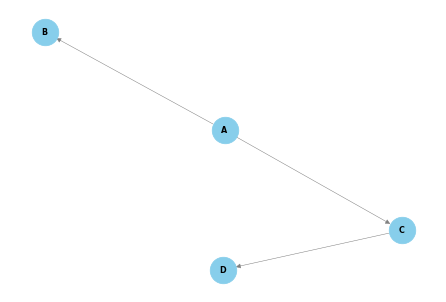

DiGraph with 4 nodes and 3 edges


In [77]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_vertex(self, vertex):
        if vertex not in self.adjacency_list:
            self.adjacency_list[vertex] = []

    def add_edge(self, vertex1, vertex2):
        self.add_vertex(vertex1)
        self.add_vertex(vertex2)
        self.adjacency_list[vertex1].append(vertex2)
        # self.adjacency_list[vertex2].append(vertex1)

    def display_graph(self):
        G = nx.DiGraph()

        for vertex, neighbors in self.adjacency_list.items():
            G.add_node(vertex)
            for neighbor in neighbors:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G)  # 使用Spring布局算法排列节点
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', \
                linewidths=0.8, width=0.5)
        plt.show()
        return str(G)
    
    def __str__(self) -> str:
        return self.display_graph()


# 创建一个图
my_graph = Graph()

# 添加顶点
my_graph.add_vertex("A")
my_graph.add_vertex("B")
my_graph.add_vertex("C")
my_graph.add_vertex("D")

# 添加边
my_graph.add_edge("A", "B")
my_graph.add_edge("A", "C")
my_graph.add_edge("C", "D")


# 显示平面图形表示
print(my_graph)


## 并查集

In [40]:
class UnionFind:

    def __init__(self, n) -> None:
        self.root = [i for i in range(n)]
        self.length = n

    def find(self, x):
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            for i in range(self.length):
                if self.root[i] == rootY:
                    self.root[i] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)

print("Quick Find:")
uf = UnionFind(10)
# 1-2-5-6-7 3-8-9 4
uf.union(1, 2)
uf.union(2, 5)
uf.union(5, 6)
uf.union(6, 7)
uf.union(3, 8)
uf.union(8, 9)
print(uf.connected(1, 5))
print(uf.connected(5, 7))
print(uf.connected(4, 9))
# 1-2-5-6-7 3-8-9-4
uf.union(9, 4)
print(uf.connected(4, 9))

class UnionFind:

    def __init__(self, n) -> None:
        self.root = [i for i in range(n)]

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)

print("Quick Union:")
uf = UnionFind(10)
# 1-2-5-6-7 3-8-9 4
uf.union(1, 2)
uf.union(2, 5)
uf.union(5, 6)
uf.union(6, 7)
uf.union(3, 8)
uf.union(8, 9)
print(uf.connected(1, 5))
print(uf.connected(5, 7))
print(uf.connected(4, 9))
# 1-2-5-6-7 3-8-9-4
uf.union(9, 4)
print(uf.connected(4, 9))


class UnionFind:

    def __init__(self, n) -> None:
        self.root = [i for i in range(n)]
        self.rank = [1 for _ in range(n)]

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

print("Quick Union With Rank:")
uf = UnionFind(10)
# 1-2-5-6-7 3-8-9 4
uf.union(1, 2)
uf.union(2, 5)
uf.union(5, 6)
uf.union(6, 7)
uf.union(3, 8)
uf.union(8, 9)
print(uf.connected(1, 5))
print(uf.connected(5, 7))
print(uf.connected(4, 9))
# 1-2-5-6-7 3-8-9-4
uf.union(9, 4)
print(uf.connected(4, 9))


class UnionFind:

    def __init__(self, n) -> None:
        self.root = [i for i in range(n)]

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)

print("Quick Union With Compress:")
uf = UnionFind(10)
# 1-2-5-6-7 3-8-9 4
uf.union(1, 2)
uf.union(2, 5)
uf.union(5, 6)
uf.union(6, 7)
uf.union(3, 8)
uf.union(8, 9)
print(uf.connected(1, 5))
print(uf.connected(5, 7))
print(uf.connected(4, 9))
# 1-2-5-6-7 3-8-9-4
uf.union(9, 4)
print(uf.root)
print(uf.connected(2, 4))
uf.union(7, 4)
print(uf.root)
print(uf.connected(2, 4))
print(uf.root)
print(uf.connected(2, 8))
print(uf.root)
print(uf.connected(2, 9))
print(uf.root)


class UnionFind:

    def __init__(self, n) -> None:
        self.root = [i for i in range(n)]
        self.rank = [1 for _ in range(n)]

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

print("Quick Union With Rank and Compress:")
uf = UnionFind(10)
# 1-2-5-6-7 3-8-9 4
uf.union(1, 2)
uf.union(2, 5)
uf.union(5, 6)
uf.union(6, 7)
uf.union(3, 8)
uf.union(8, 9)
print(uf.connected(1, 5))
print(uf.connected(5, 7))
print(uf.connected(4, 9))
# 1-2-5-6-7 3-8-9-4
uf.union(9, 4)
print(uf.connected(4, 9))

Quick Find:
True
True
False
True
Quick Union:
True
True
False
True
Quick Union With Rank:
True
True
False
True
Quick Union With Compress:
True
True
False
[0, 1, 1, 3, 3, 1, 1, 1, 3, 3]
False
[0, 1, 1, 1, 3, 1, 1, 1, 3, 3]
True
[0, 1, 1, 1, 1, 1, 1, 1, 3, 3]
True
[0, 1, 1, 1, 1, 1, 1, 1, 1, 3]
True
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quick Union With Rank and Compress:
True
True
False
True


## 无向图中连通分量的数目

In [41]:
def countComponents(n, edges):
    uf = UnionFind(n)
    nodes = [False] * n
    for s, e in edges:
        uf.union(s, e)
    ans = 0
    cnt = 0
    for i in range(n):
        if nodes[i]: continue
        nodes[i] = True
        cnt += 1
        for j in range(i+1, n):
            if uf.connected(i, j):
                nodes[j] = True
                cnt += 1
        ans += 1
        if cnt == n:
            break
    return ans

n = 5
edges = [[0, 1], [1, 2], [3, 4]]
print(countComponents(n, edges))

n = 5
edges = [[0,1], [1,2], [2,3], [3,4]]
print(countComponents(n, edges))

2
1


In [42]:
def countComponents(n, edges):
    adj = {}
    for i in range(n):
        if i not in adj:
            adj[i] = set()
    for s, e in edges:
        adj[s].add(e)
        adj[e].add(s)
    ans = 0
    visited = [False] * n
    def dfs(i):
        visited[i] = True
        e = adj[i]
        for j in e:
            if not visited[j]:
                dfs(j)
    for i in range(n):
        if not visited[i]:
            dfs(i)
            ans += 1
    return ans

n = 5
edges = [[0, 1], [1, 2], [3, 4]]
print(countComponents(n, edges))

n = 5
edges = [[0,1], [1,2], [2,3], [3,4]]
print(countComponents(n, edges)) 

2
1


## 冗余连接（有环无向图）
找出n条边n个节点的无向图中可以删去的边，删除后可使得剩余部分是一个有着 n 个节点的树（无环无向图）

https://leetcode.cn/problems/redundant-connection/description/

In [50]:
def findRedundantConnection(edges):
    n = len(edges)
    for i in range(n-1, -1, -1):
        uf = UnionFind(n)
        for j in range(n):
            if i != j:
                s, e = edges[j]
                uf.union(s-1, e-1)
        pivot = 0
        for k in range(1, n):
            if not uf.connected(pivot, k):
                break
        else:
            return edges[i]

edges = [[1,2], [1,3], [2,3]]
print(findRedundantConnection(edges))

edges = [[1,2], [2,3], [3,4], [1,4], [1,5]]
print(findRedundantConnection(edges))

[2, 3]
[1, 4]


In [53]:
# 优化后的结果
def findRedundantConnection(edges):
    n = len(edges)
    uf = UnionFind(n)
    for s, e in edges:
        if uf.connected(s-1, e-1):
            return [s, e]
        else:
            uf.union(s-1, e-1)

edges = [[1,2], [1,3], [2,3]]
print(findRedundantConnection(edges))

edges = [[1,2], [2,3], [3,4], [1,4], [1,5]]
print(findRedundantConnection(edges))

[2, 3]
[1, 4]


## 安全节点（拓扑排序、三色标记法深度遍历）
https://leetcode.cn/problems/find-eventual-safe-states/description/

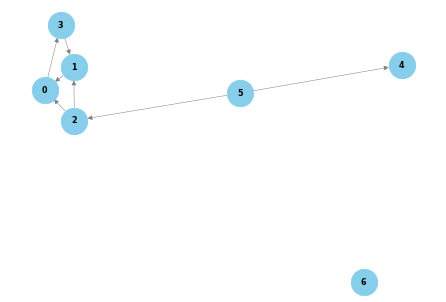

DiGraph with 7 nodes and 7 edges
[2, 4, 5, 6]


In [114]:
def eventualSafeNodes(graph):
    adj = {}
    queue = []
    out = {}
    n = len(graph)
    for i in range(n):
        adj[i] = set()
    for i in range(n):
        edges = graph[i]
        for j in edges:
            adj[j].add(i)
        out[i] = out.get(i, 0) + len(edges)
        if len(edges) == 0:
            queue.append(i)
    ans = []
    while queue:
        i = queue.pop(0)
        ans.append(i)
        for j in adj[i]:
            if out[j] <= 0:
                continue
            out[j] -= 1
            if out[j] == 0:
                queue.append(j)
    return sorted(ans)

graph = [[1,2],[2,3],[5],[0],[5],[],[]]
g = Graph()
for i in range(len(graph)):
    g.add_vertex(i)
    for j in graph[i]:
        g.add_edge(j, i)
print(g)
print(eventualSafeNodes(graph))

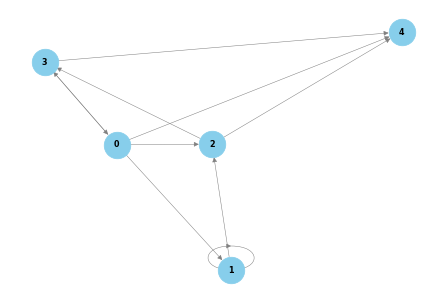

DiGraph with 5 nodes and 10 edges
[4]


In [107]:
def eventualSafeNodes(graph):        
    n = len(graph)
    color = [0] * n

    def safe(x: int) -> bool:
        if color[x] > 0:
            return color[x] == 2
        color[x] = 1
        for y in graph[x]:
            if not safe(y):
                return False
        color[x] = 2
        return True

    return [i for i in range(n) if safe(i)]

graph = [[1,2,3,4],[1,2],[3,4],[0,4],[]]
g = Graph()
for i in range(len(graph)):
    g.add_vertex(i)
    for j in graph[i]:
        g.add_edge(i, j)
print(g)
print(eventualSafeNodes(graph))